In [1]:
from potentials import d_poly__d_x
import numpy as np
import matplotlib.pyplot as plt

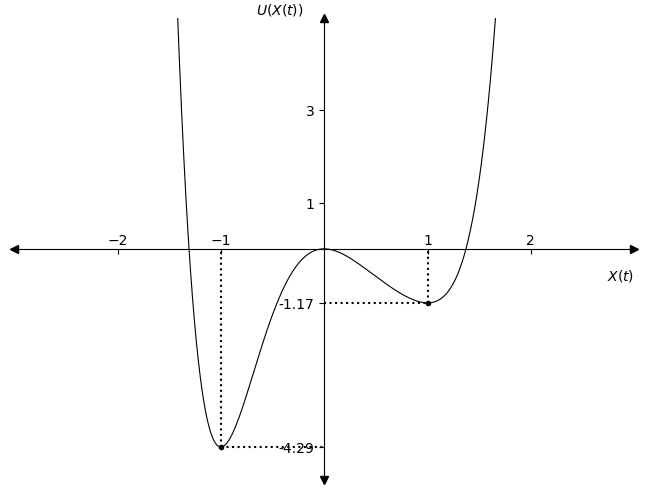

In [38]:
num_steps = 10000

def int_pot(x, a_6=1, a_2=-3.2, t=0, period=100):
    beta = 3
    a_3 = beta * np.sin(2*np.pi * t/period)

    a_5 = (-3/5)*a_3
    a_4 = (-3*a_6 - a_2)/2
    all_scale = 1.3

    return all_scale * (a_6 * x**6 + a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2)


x = np.linspace(-2, 2, num_steps)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, int_pot(x, t=25), 'k-', linewidth=0.8)
plt.ylim((-5, 5))
plt.xlim((-3, 3))
ax.tick_params(axis='x', which='major', pad=-15)

plt.xticks([-2, -1, 1, 2])
plt.yticks([-4.29, -1.17, 1, 3])


# Create the tick label objects with different alignments
labels = [
    plt.Text(0, 0, '-4.29', horizontalalignment='right'),  # This label will be on the right
    plt.Text(0, 0, '-1.17', horizontalalignment='right'), # Rest stay on the left
    plt.Text(0, 0, '1', horizontalalignment='right'),
    plt.Text(0, 0, '3', horizontalalignment='right')
]

# Set the tick labels with their specified alignments
ax.set_yticklabels(labels)

plt.xlabel(r'$X(t)$', loc='right', labelpad=10)
plt.ylabel(r'$U(X(t))$', loc='top', rotation=0, labelpad=-18)
ax.scatter([-1, 1], [-4.29, -1.17], marker='.', color='black')
ax.vlines([1], ymin=-1.17, ymax=0, linestyles='dotted', colors='black')
ax.vlines([-1], ymin=-4.29, ymax=0, linestyles='dotted', colors='black')
ax.hlines([-4.29], xmax=0, xmin=-1, linestyles='dotted', colors='black')
ax.hlines([-1.17], xmax=1, xmin=0, linestyles='dotted', colors='black')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot((0), (1), '^k', transform=ax.get_xaxis_transform(), clip_on=False)  # Y-axis arrow
ax.plot((0), (0), 'vk', transform=ax.get_xaxis_transform(), clip_on=False)  # Y-axis arrow
ax.plot((1), (0), '>k', transform=ax.get_yaxis_transform(), clip_on=False)  # X-axis arrow
ax.plot((-0), (0), '<k', transform=ax.get_yaxis_transform(), clip_on=False)  # X-axis arrow
plt.savefig('results/jump_const_neg_potential.svg', transparent=True)

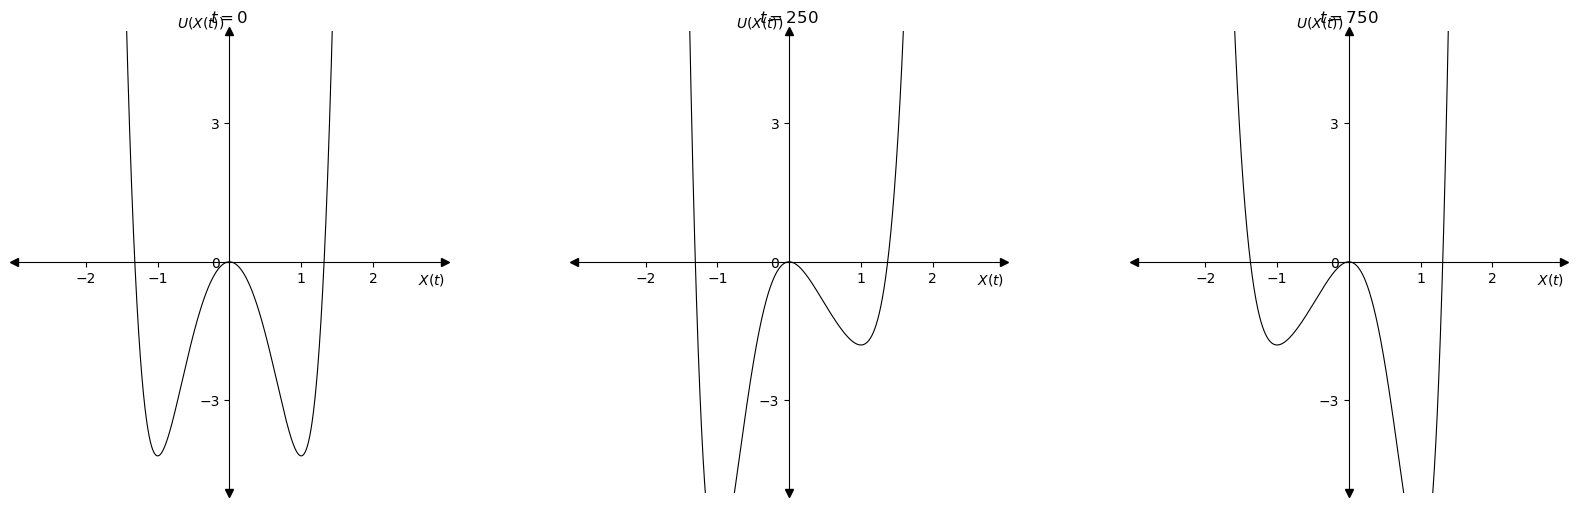

In [53]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 10000

def int_pot(x, a_6=1, a_2=-3.2, t=0, period=1000):
    beta = 3
    a_3 = beta * np.sin(2*np.pi * t/period)
    a_5 = (-3/5)*a_3
    a_4 = (-3*a_6 - a_2)/2
    all_scale = 2
    return all_scale * (a_6 * x**6 + a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2)

x = np.linspace(-2, 2, num_steps)
time_points = [0, 250, 750]

# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)  # Adjust spacing between plots

# Common styling function
def style_subplot(ax, t):
    ax.set_ylim((-5, 5))
    ax.set_xlim((-3, 3))
    ax.set_xticks([-2, -1, 1, 2])
    ax.set_yticks([-3, 0, 3])
    ax.set_xlabel(r'$X(t)$', loc='right', labelpad=-10)
    ax.set_ylabel(r'$U(X(t))$', loc='top', rotation=0, labelpad=-18)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Add arrows
    ax.plot((0), (1), '^k', transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot((0), (0), 'vk', transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot((1), (0), '>k', transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((-0), (0), '<k', transform=ax.get_yaxis_transform(), clip_on=False)
    
    ax.set_title(f'$t={t}$')

# Plot for each time point
for i, t in enumerate(time_points):
    axes[i].plot(x, int_pot(x, t=t), 'k-', linewidth=0.8)
    style_subplot(axes[i], t)

plt.savefig('results/time_dep_all.svg', transparent=True)
plt.show()

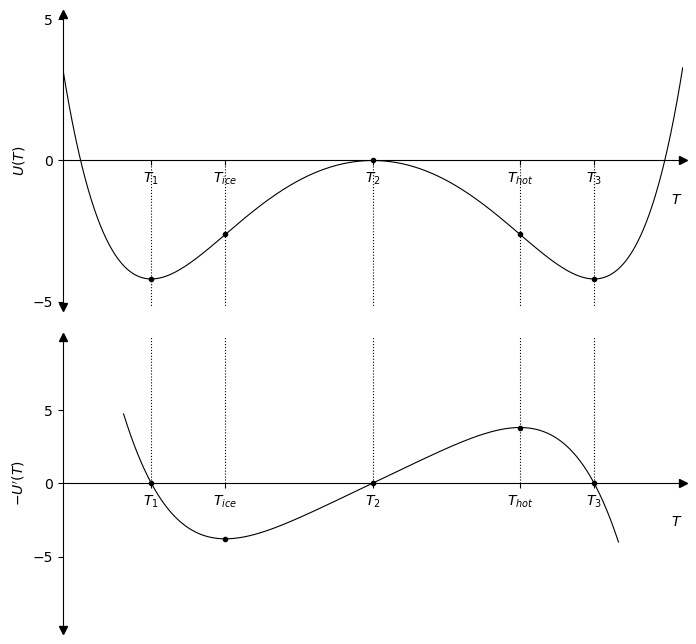

In [ ]:
# Generate data
t = np.zeros(10000)
x = np.linspace(-1.5, 1.5, t.shape[0])
extraticks = [-1, -0.66507, 0, 0.66507, 1]


# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), height_ratios=[1, 1])
plt.subplots_adjust(hspace=0.1)  # Reduce space between plots

# Top subplot
ax1.plot(x, int_pot(x), 'k-', linewidth=0.8)
ax1.scatter(extraticks, int_pot(np.array(extraticks)), color='black', marker='.')

ax1.set_xlim((-1.4, 1.4))
ax1.set_xticks([])  # Remove x-ticks for top plot
ax1.set_xticks(extraticks)
ax1.set_xticklabels(['$T_1$', r'$T_{ice}$', '$T_2$', r'$T_{hot}$', '$T_3$'])
ax1.set_xlabel('$T$', loc='right')
ax1.vlines(extraticks, ymin=0, ymax=-10, colors='black', linestyles=':', linewidth=0.8)
ax1.set_ylim((-5.2, 5.2))
ax1.set_yticks([-5, 0, 5])
ax1.set_ylabel('$U(T)$')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position('zero')

# Add arrows for top subplot
ax1.plot((1), (0), '>k', transform=ax1.get_yaxis_transform(), clip_on=False)
ax1.plot((-1.4), (1), '^k', transform=ax1.get_xaxis_transform(), clip_on=False)
ax1.plot((-1.4), (0), 'vk', transform=ax1.get_xaxis_transform(), clip_on=False)

# Bottom subplot (your original plot)
ax2.plot(x[1250:8700], -d_poly__d_x(x[1250:8700], t[1250:8700]), 'k-', linewidth=0.8)
ax2.scatter(extraticks, -d_poly__d_x(np.array(extraticks), 0), color='black', marker='.')
ax2.set_yticks([-5, 0, 5])
ax2.set_ylim((-10, 10))
ax2.set_xlim((-1.4, 1.4))
ax2.set_xlabel('$T$', loc='right')
ax2.set_ylabel(r'$-U^{\prime}(T)$')
ax2.set_xticks(extraticks)
ax2.set_xticklabels(['$T_1$', r'$T_{ice}$', '$T_2$', r'$T_{hot}$', '$T_3$'])
ax2.spines['bottom'].set_position('zero')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.vlines(extraticks, ymin=0, ymax=10, colors='black', linestyles=':', linewidth=0.8)


# Add arrows for bottom subplot
ax2.plot((-1.4), (1), '^k', transform=ax2.get_xaxis_transform(), clip_on=False)
ax2.plot((-1.4), (0), 'vk', transform=ax2.get_xaxis_transform(), clip_on=False)
ax2.plot((1), (0), '>k', transform=ax2.get_yaxis_transform(), clip_on=False)


# Save the figure
plt.savefig('results/der_pot_showcase.svg', transparent=True)
plt.show()

In [9]:
a = 0.005
b = -1.9343
c = 2.14
d = 4.3

def d_f__d_x(x, a=a, b=b, c=c, d=d):
    """
    Calculates the derivative of ax^2(x-c)^2(x-b)^3(x-d)^3
    
    Parameters:
        x: point at which to evaluate derivative
        a, b, c, d: coefficients (default to 1)
    """
    # Breaking down the function into parts for clarity
    # f(x) = ax^2 * (x-c)^2 * (x-b)^3 * (x-d)^3
    
    # Using the product rule repeatedly
    term1 = 2 * x                      # derivative of x^2
    term2 = (x - c) ** 2              # (x-c)^2
    term3 = (x - b) ** 3              # (x-b)^3
    term4 = (x - d) ** 3              # (x-d)^3
    
    term5 = x ** 2                     # x^2
    term6 = 2 * (x - c)               # derivative of (x-c)^2
    
    term7 = x ** 2                     # x^2
    term8 = (x - c) ** 2              # (x-c)^2
    term9 = 3 * (x - b) ** 2          # derivative of (x-b)^3
    
    term10 = x ** 2                    # x^2
    term11 = (x - c) ** 2             # (x-c)^2
    term12 = (x - b) ** 3             # (x-b)^3
    term13 = 3 * (x - d) ** 2         # derivative of (x-d)^3
    
    # Combining all terms using the product rule
    derivative = a * (
        term1 * term2 * term3 * term4 +    # derivative of x^2 term
        term5 * term6 * term3 * term4 +    # derivative of (x-c)^2 term
        term7 * term8 * term9 * term4 +    # derivative of (x-b)^3 term
        term10 * term11 * term12 * term13  # derivative of (x-d)^3 term
    )
    
    return derivative

In [11]:
import numpy as np
import matplotlib.pyplot as plt

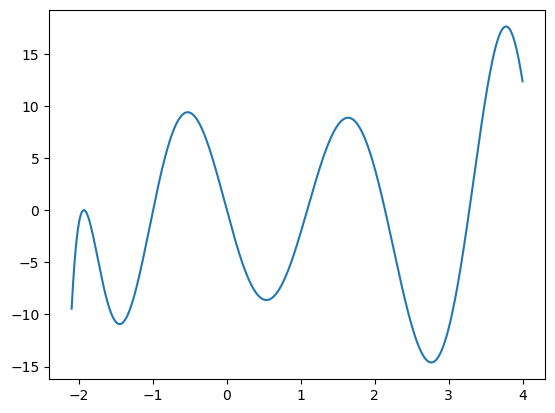

In [12]:
x = np.linspace(-2.1, 4, 10000)

plt.plot(x, d_f__d_x(x))

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 10000

def int_pot(x, a_6=1, a_2=-3.2, t=0, period=1000):
    beta = 3
    a_3 = beta * np.sin(2*np.pi * t/period)
    a_5 = (-3/5)*a_3
    a_4 = (-3*a_6 - a_2)/2
    all_scale = 1.2
    return all_scale * (a_6 * x**6 + a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2)

def create_and_save_plot(t):
    x = np.linspace(-2, 2, num_steps)
    
    fig = plt.figure(figsize=(4, 6))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(x, int_pot(x, t=t), 'k-', linewidth=0.8)
    plt.ylim((-6, 6))
    plt.xlim((-2, 2))
    plt.xticks([-1, 1])
    plt.yticks([-4, -2, 0, 2, 4])
    plt.xlabel(r'$X(t)$', loc='right', labelpad=-10)
    plt.ylabel(r'$U(X(t))$', loc='top', rotation=0, labelpad=-18)
    
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Add arrows
    ax.plot((0), (1), '^k', transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot((0), (0), 'vk', transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot((1), (0), '>k', transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((-0), (0), '<k', transform=ax.get_yaxis_transform(), clip_on=False)
    
    plt.savefig(f'results/time_dep_{t}.svg', transparent=True)
    plt.close()

# Create plots for each time point
time_points = [0, 250, 750]
for t in time_points:
    create_and_save_plot(t)

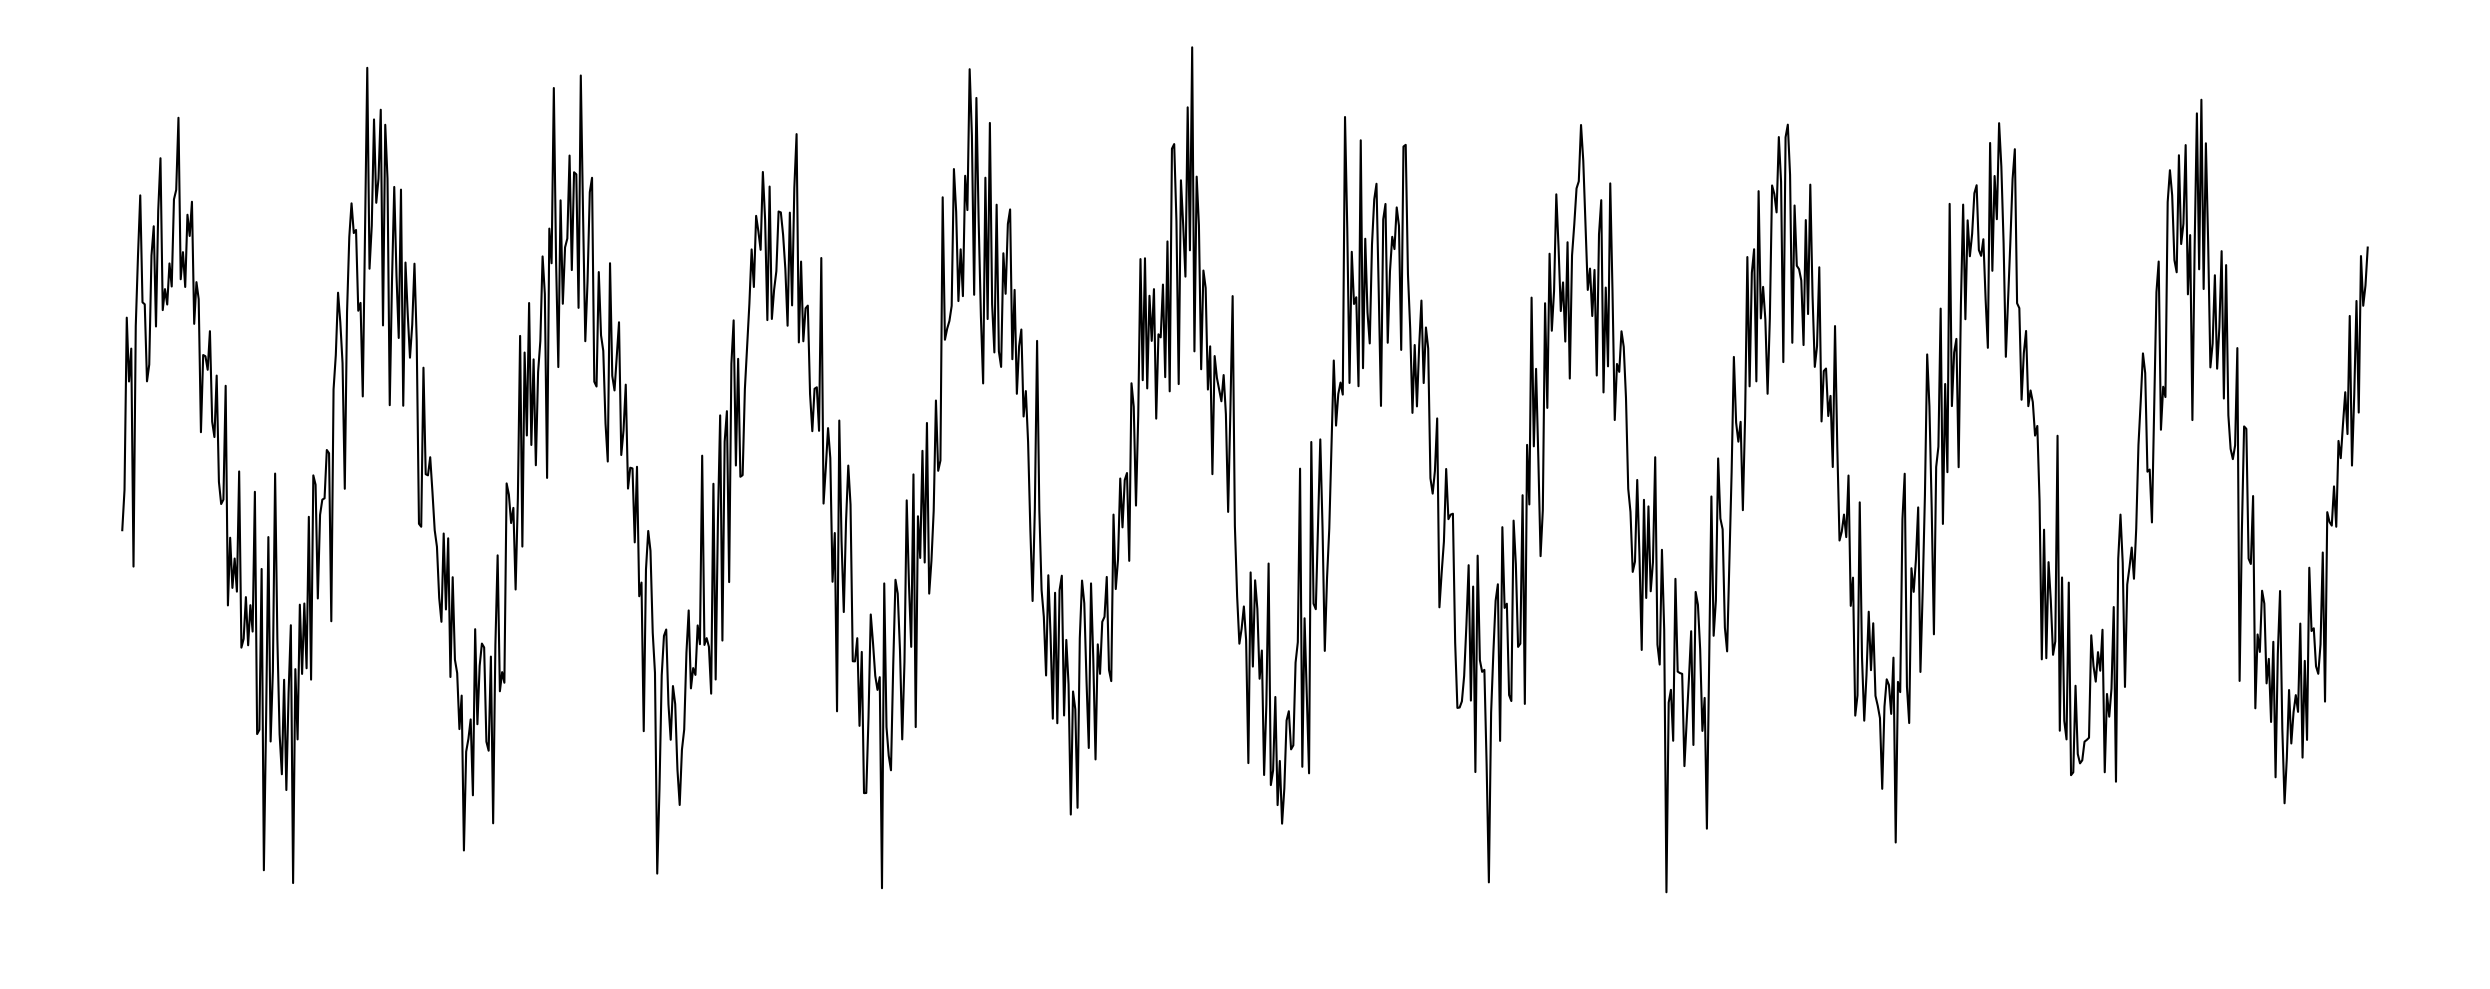

In [36]:
x = np.linspace(0,70,1000)
noise = np.random.normal(loc=0.1, scale=0.3, size=1000)
y = np.sin(x)
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(1, 1, 1)
#ax.plot(x, y)
ax.plot(x, y + noise, color='black')
plt.ylim(-2,2)
plt.yticks([])
plt.xticks([])
#ax.hlines([1.1], xmin=0, xmax=100, colors='black', linewidth=0.8, linestyles='dashed')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('noisy_sin.svg', transparent=True)